In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Получение данных

In [2]:
frequency = pd.read_csv("frequency.csv")

In [3]:
frequency.head()

,1.pptx,2.txt,3.pdf,4.docx,5.jpg,6.jpg,7.BMP,8.bmp,9.dll,10.exe,11.mp4,12.txt
0,0.032372,0.0,0.009049,0.009219,0.007906,0.015146,0.087539,0.001188,0.135903,0.014504,0.050785,0.0
1,0.004306,0.0,0.003256,0.004221,0.003215,0.003498,0.000024,0.005588,0.009458,0.004519,0.009365,0.0
2,0.003745,0.0,0.003432,0.003633,0.002178,0.002163,0.000000,0.012607,0.004700,0.004529,0.005484,0.0
3,0.004542,0.0,0.003465,0.004411,0.004390,0.003268,0.000012,0.016535,0.004996,0.004339,0.004003,0.0
4,0.003622,0.0,0.003048,0.004083,0.003216,0.001818,0.000013,0.021021,0.008653,0.004399,0.004970,0.0


In [4]:
overall_data = pd.read_csv("overall.csv")

In [5]:
overall_data.head(12)

,S1,H,SF_S2,SF_K,SF_TU,SF_TP,LZ77_5_S2,LZ77_5_K,LZ77_5_TU,LZ77_5_TP,...,LZ77_10_TU,LZ77_10_TP,LZ77_20_S2,LZ77_20_K,LZ77_20_TU,LZ77_20_TP,LZW_S2,LZW_K,LZW_TU,LZW_TP
0,4568.51,7.93315,4548.54,0.995628,8.84195,9.06923,7671.6200,1.679240,7.768710,85.75360,...,7.648750,144.76600,7784.46000,1.703940,7.559200,251.13800,8076.540,1.767870,18.39350,17.92920
1,4600.58,4.62785,2692.57,0.585267,5.40664,6.50094,3394.9000,0.737929,3.613890,42.18210,...,3.518120,69.38320,3106.42000,0.675223,3.364970,115.91800,2875.510,0.625033,7.20235,7.68651
2,4308.05,7.97823,4317.73,1.002250,9.02704,8.67623,7649.9900,1.775740,7.507240,83.86970,...,7.646420,144.63900,7929.25000,1.840560,7.665450,255.69700,8071.890,1.873670,18.34350,17.86510
3,4519.20,7.99257,4529.84,1.002350,8.78301,9.07919,8344.0400,1.846350,8.949740,91.50660,...,9.112060,158.76900,8645.80000,1.913130,9.092590,278.75700,8778.820,1.942560,20.70130,20.10110
4,4782.90,7.95828,4789.46,1.001370,9.24113,9.63700,8840.1100,1.848270,9.374440,96.71890,...,9.530260,167.07500,9086.79000,1.899850,9.499420,294.07600,8945.350,1.870280,21.21710,20.58960
5,4392.70,7.89812,4365.48,0.993803,8.50702,8.75149,7966.5800,1.813600,7.812590,87.49550,...,7.911010,148.94200,8120.94000,1.848740,8.209940,262.40900,8077.570,1.838860,18.58730,18.38520
6,4164.37,6.96842,3661.23,0.879180,6.84277,7.25658,5152.7400,1.237340,5.371790,60.01170,...,4.836920,87.81220,4278.35000,1.027370,4.658540,145.27100,4671.730,1.121830,11.37490,10.69940
7,4602.20,7.56801,4384.53,0.952704,8.36856,7.68687,2690.5000,0.584613,3.015340,30.65010,...,2.937500,49.68580,2523.96000,0.548424,2.958770,85.25410,2421.320,0.526122,6.65642,7.15381
8,4760.00,6.62670,3965.51,0.833090,7.69552,7.91535,3996.5800,0.839617,4.246600,48.37630,...,4.032000,78.42710,3898.87000,0.819090,3.982980,133.28600,4764.880,1.001030,11.63950,11.48640
9,3812.18,7.98287,3814.88,1.000710,7.23069,7.35743,6966.5500,1.827440,7.072970,78.71530,...,7.270600,136.45800,7284.61000,1.910880,7.085390,237.01700,7418.540,1.946010,16.88100,16.34910


#### Добавим поле TIME для каждого алгоритма, которое будет отображать суммарное время на упаковку и распаковку

In [6]:
overall_data['SF_TIME'] = overall_data['SF_TU'] + overall_data['SF_TP']
overall_data['LZ77_5_TIME'] = overall_data['LZ77_5_TU'] + overall_data['LZ77_5_TP']
overall_data['LZ77_10_TIME'] = overall_data['LZ77_10_TU'] + overall_data['LZ77_10_TP']
overall_data['LZ77_20_TIME'] = overall_data['LZ77_20_TU'] + overall_data['LZ77_20_TP']
overall_data['LZW_TIME'] = overall_data['LZW_TU'] + overall_data['LZW_TP']

In [7]:
overall_data.shape

(12, 27)

# Составление таблиц

#### Коэффициенты сжатия файлов

In [8]:
k_table = overall_data[['S1', 'H', 'SF_S2', 'SF_K', 'LZ77_5_S2', 'LZ77_5_K', 'LZ77_10_S2', 'LZ77_10_K', 'LZ77_20_S2', 'LZ77_20_K', 'LZW_S2', 'LZW_K']]
k_table.round(3)

,S1,H,SF_S2,SF_K,LZ77_5_S2,LZ77_5_K,LZ77_10_S2,LZ77_10_K,LZ77_20_S2,LZ77_20_K,LZW_S2,LZW_K
0,4568.51,7.933,4548.54,0.996,7671.620,1.679,7870.040,1.723,7784.460,1.704,8076.540,1.768
1,4600.58,4.628,2692.57,0.585,3394.900,0.738,3272.960,0.711,3106.420,0.675,2875.510,0.625
2,4308.05,7.978,4317.73,1.002,7649.990,1.776,7848.470,1.822,7929.250,1.841,8071.890,1.874
3,4519.20,7.993,4529.84,1.002,8344.040,1.846,8590.880,1.901,8645.800,1.913,8778.820,1.943
4,4782.90,7.958,4789.46,1.001,8840.110,1.848,9071.310,1.897,9086.790,1.900,8945.350,1.870
5,4392.70,7.898,4365.48,0.994,7966.580,1.814,8134.480,1.852,8120.940,1.849,8077.570,1.839
6,4164.37,6.968,3661.23,0.879,5152.740,1.237,4510.110,1.083,4278.350,1.027,4671.730,1.122
7,4602.20,7.568,4384.53,0.953,2690.500,0.585,2606.760,0.566,2523.960,0.548,2421.320,0.526
8,4760.00,6.627,3965.51,0.833,3996.580,0.840,3938.120,0.827,3898.870,0.819,4764.880,1.001
9,3812.18,7.983,3814.88,1.001,6966.550,1.827,7208.590,1.891,7284.610,1.911,7418.540,1.946


#### Таблица времени упаковки / распаковки файлов

In [9]:
times_table = overall_data[['S1', 'H', 'SF_TU', 'SF_TP', 'LZ77_5_TU', 'LZ77_5_TP', 'LZ77_10_TU', 'LZ77_10_TP', 'LZ77_20_TU', 'LZ77_20_TP', 'LZW_TU', 'LZW_TP']]
times_table.round(3)

,S1,H,SF_TU,SF_TP,LZ77_5_TU,LZ77_5_TP,LZ77_10_TU,LZ77_10_TP,LZ77_20_TU,LZ77_20_TP,LZW_TU,LZW_TP
0,4568.51,7.933,8.842,9.069,7.769,85.754,7.649,144.766,7.559,251.138,18.394,17.929
1,4600.58,4.628,5.407,6.501,3.614,42.182,3.518,69.383,3.365,115.918,7.202,7.687
2,4308.05,7.978,9.027,8.676,7.507,83.870,7.646,144.639,7.665,255.697,18.344,17.865
3,4519.20,7.993,8.783,9.079,8.950,91.507,9.112,158.769,9.093,278.757,20.701,20.101
4,4782.90,7.958,9.241,9.637,9.374,96.719,9.530,167.075,9.499,294.076,21.217,20.590
5,4392.70,7.898,8.507,8.751,7.813,87.496,7.911,148.942,8.210,262.409,18.587,18.385
6,4164.37,6.968,6.843,7.257,5.372,60.012,4.837,87.812,4.659,145.271,11.375,10.699
7,4602.20,7.568,8.369,7.687,3.015,30.650,2.938,49.686,2.959,85.254,6.656,7.154
8,4760.00,6.627,7.696,7.915,4.247,48.376,4.032,78.427,3.983,133.286,11.640,11.486
9,3812.18,7.983,7.231,7.357,7.073,78.715,7.271,136.458,7.085,237.017,16.881,16.349


### Подготовка к построению диаграмм

In [10]:
column_size=1/12
number_of_columns=12
comp=0.8

# Defining colors
colors = ['midnightblue', 'blue', 'gold', 'slateblue', 'lightseagreen', 'forestgreen', 'darkseagreen', 'crimson', 'fuchsia', 'violet', 'coral', 'silver']
colors2 = ['dodgerblue', 'crimson', 'gold', 'seagreen', 'lightskyblue', 'limegreen', 'sandybrown', 'mediumslateblue', 'thistle', 'indigo', 'darkgrey', 'fuchsia']

# Setting positions for each column
x=[]
for i in range(0, number_of_columns//2):
    x.append(1-(number_of_columns/2-i)*column_size)
for i in range(number_of_columns//2, 0, -1):
    x.append(1+(number_of_columns/2-i)*column_size)

In [11]:
algorithms = ['SF', 'LZ77_5', 'LZ77_10', 'LZ77_20', 'LZW']

In [12]:
def autolabel(ax, rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

In [13]:
def drawDiagram(algorithm, message, y_axis_label, ylim_top, pallete=colors):
    y=overall_data[algorithm]
    
    # Drawing plot    
    fig, ax = plt.subplots()
    patches = []
    for i in range(0, number_of_columns):
        ax.bar(x[i], y[i], width=column_size*comp, color=pallete[i])
        patch = mpatches.Patch(color=pallete[i], label=f'{frequency.columns[i]}')
        patches.append(patch)

    plt.tick_params(
        axis='x',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False)

    plt.ylim(top=ylim_top)
    
    ax.set_facecolor('ivory')
    ax.set_ylabel(y_axis_label)
    ax.set_title(message)
    fig.set_figwidth(8)
    fig.set_figheight(8)

#     ax.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#               fancybox=True, shadow=True, ncol=5)
    
    autolabel(ax, ax.patches, labels=np.around(y, decimals=3), height_factor=1.01)

    plt.savefig(f'{algorithm}.png')
    plt.show()

# Диаграммы, отображающие эффективность сжатия

In [14]:
def analyzeK(algorithm, name):
    drawDiagram(f'{algorithm}_K', f'Диаграмма эффективности сжатия алгоритмом {name}', 'Коэффициент сжатия файла', 2.15)

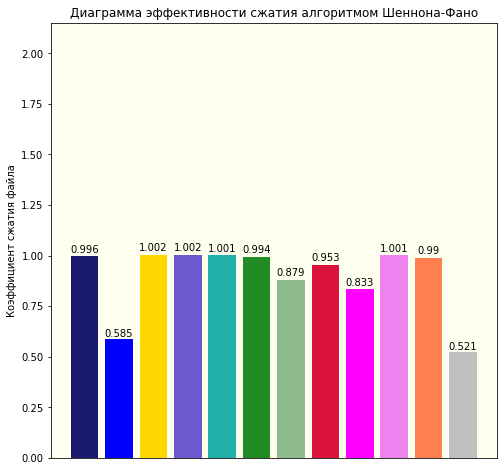

In [15]:
analyzeK(algorithms[0], "Шеннона-Фано")

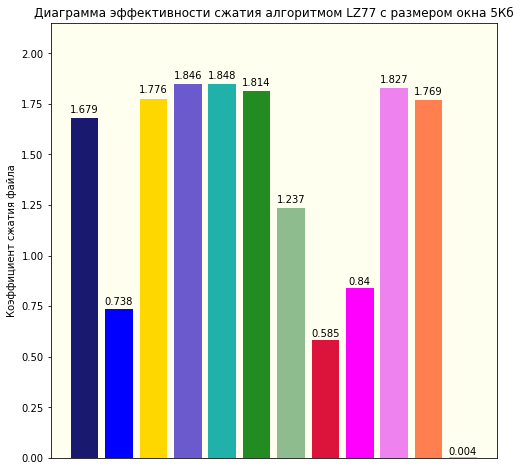

In [16]:
analyzeK(algorithms[1], "LZ77 с размером окна 5Кб")

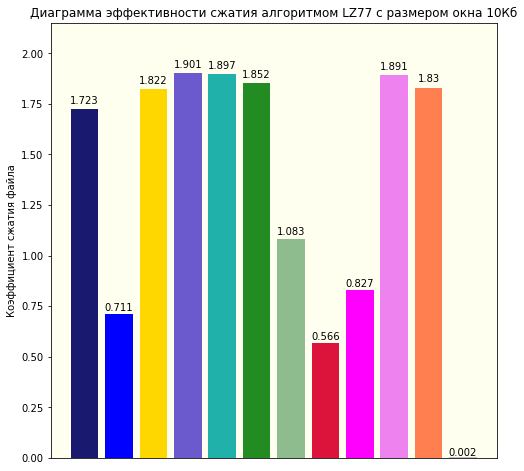

In [17]:
analyzeK(algorithms[2], "LZ77 с размером окна 10Кб")

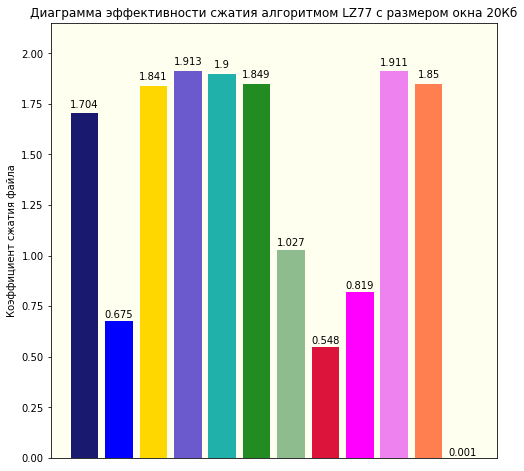

In [18]:
analyzeK(algorithms[3], "LZ77 с размером окна 20Кб")

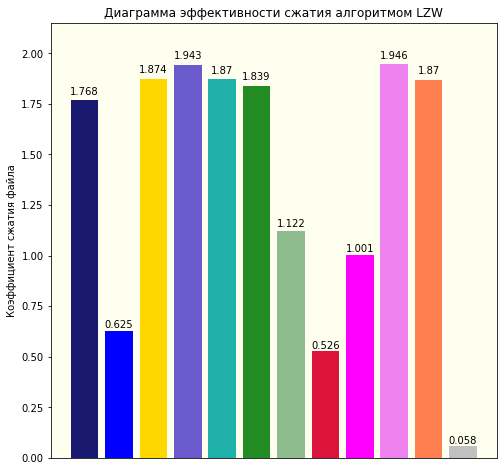

In [19]:
analyzeK(algorithms[4], "LZW")

# Диаграммы, отображающие время упаковки

In [20]:
def analyzeTP(algorithm, name):
    drawDiagram(f'{algorithm}_TP', f'Диаграмма времени упаковки алгоритмом {name}', 'Время упаковки, секунды', 320, colors2)

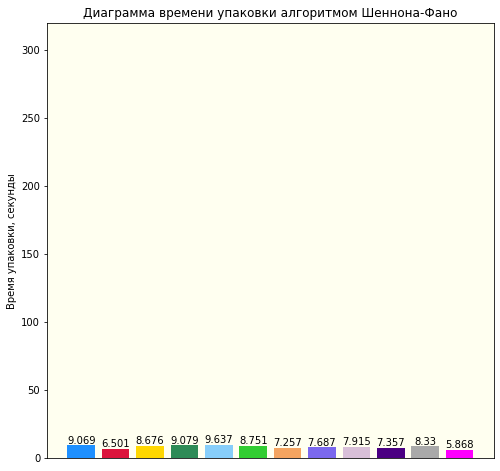

In [21]:
analyzeTP(algorithms[0], "Шеннона-Фано")

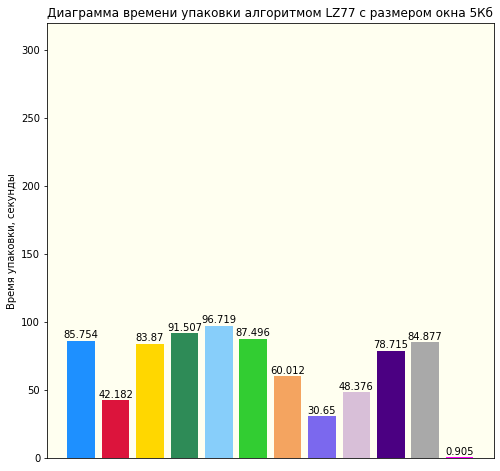

In [22]:
analyzeTP(algorithms[1], "LZ77 с размером окна 5Кб")

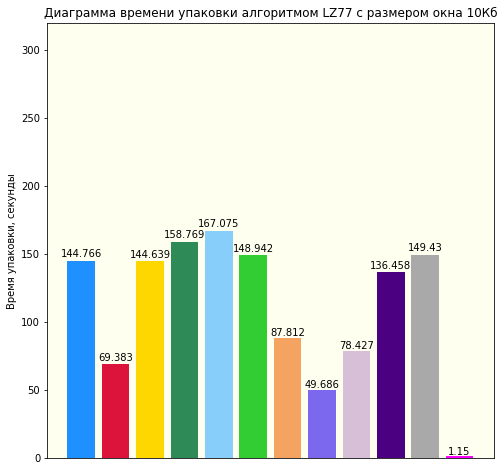

In [23]:
analyzeTP(algorithms[2], "LZ77 с размером окна 10Кб")

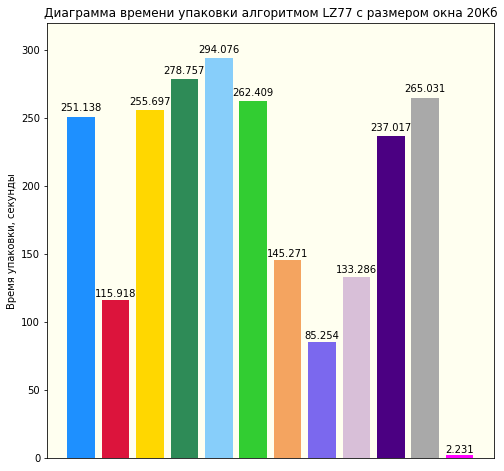

In [24]:
analyzeTP(algorithms[3], "LZ77 с размером окна 20Кб")

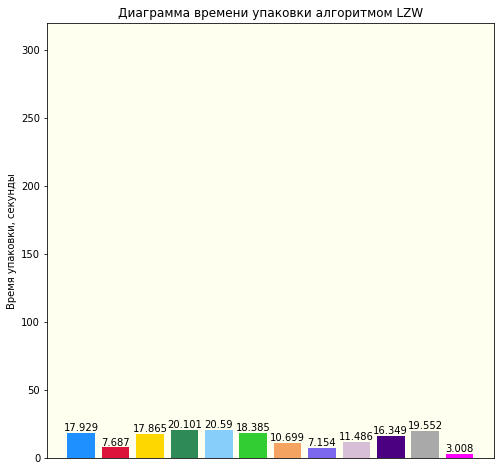

In [25]:
analyzeTP(algorithms[4], "LZW")

# # Диаграммы, отображающие время распаковки

In [26]:
def analyzeTU(algorithm, name):
    drawDiagram(f'{algorithm}_TU', f'Диаграмма времени распаковки алгоритмом {name}', 'Время распаковки, секунды', 27.15)

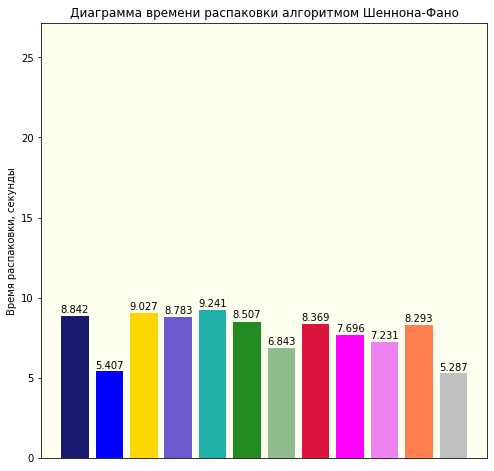

In [27]:
analyzeTU(algorithms[0], "Шеннона-Фано")

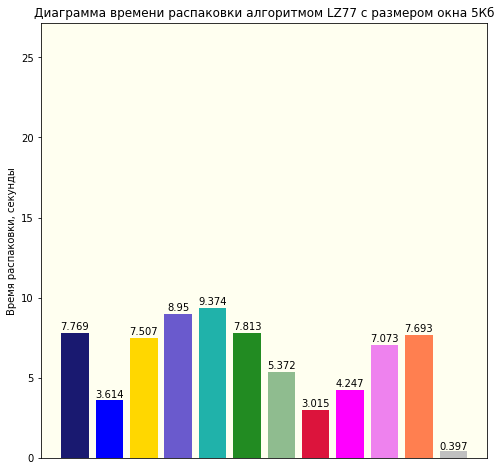

In [28]:
analyzeTU(algorithms[1], "LZ77 с размером окна 5Кб")

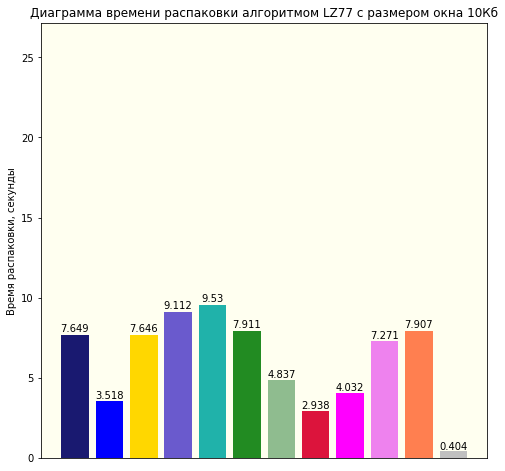

In [29]:
analyzeTU(algorithms[2], "LZ77 с размером окна 10Кб")

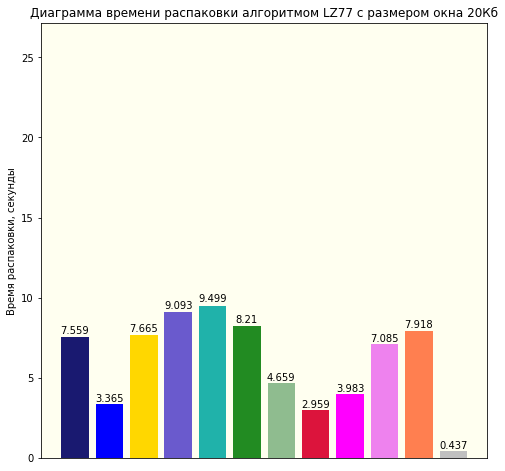

In [30]:
analyzeTU(algorithms[3], "LZ77 с размером окна 20Кб")

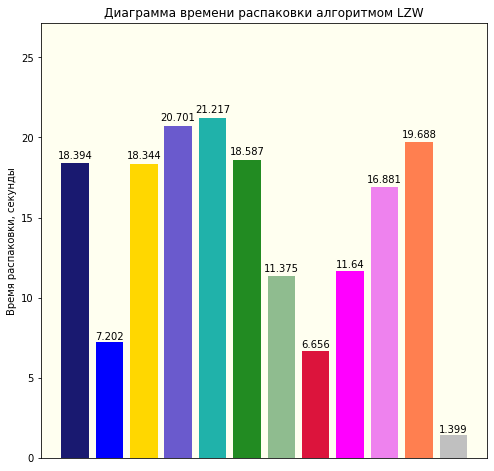

In [31]:
analyzeTU(algorithms[4], "LZW")

# Диаграммы, отображающие суммарное время упаковки и распаковки

In [48]:
def analyzeTIME(algorithm, name):
    drawDiagram(
        f'{algorithm}_TIME', 
        f'Диаграмма времени упаковки и распаковки алгоритмом {name}', 
        'Время работы, секунды', 
        330
    )

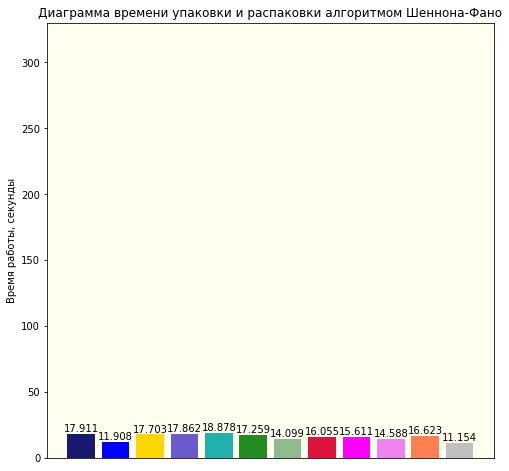

In [49]:
analyzeTIME(algorithms[0], "Шеннона-Фано")

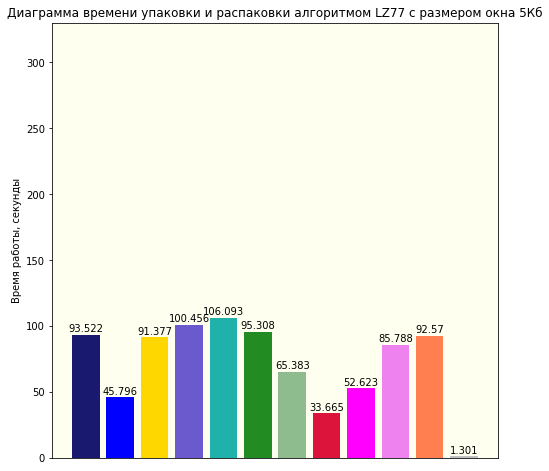

In [50]:
analyzeTIME(algorithms[1], "LZ77 с размером окна 5Кб")

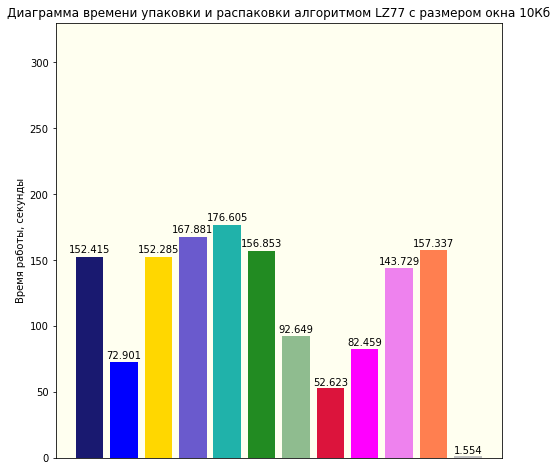

In [51]:
analyzeTIME(algorithms[2], "LZ77 с размером окна 10Кб")

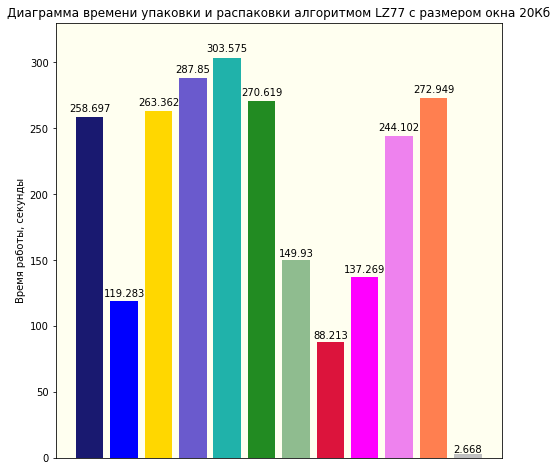

In [52]:
analyzeTIME(algorithms[3], "LZ77 с размером окна 20Кб")

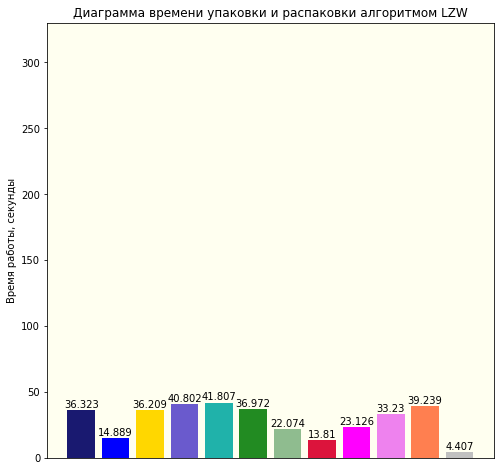

In [53]:
analyzeTIME(algorithms[4], "LZW")

<br><br><br>
## Диаграммы частот появления символов для каждого файла

In [38]:
entropy = frequency[256:]
frequency = frequency[:256]

In [39]:
frequency.tail()

,1.pptx,2.txt,3.pdf,4.docx,5.jpg,6.jpg,7.BMP,8.bmp,9.dll,10.exe,11.mp4,12.txt
251,0.003792,0.0,0.004560,0.003748,0.003320,0.007975,0.000500,0.000323,0.001758,0.003892,0.003101,0.0
252,0.003660,0.0,0.005789,0.004177,0.004206,0.007332,0.000201,0.000254,0.007074,0.003907,0.003029,0.0
253,0.003714,0.0,0.005433,0.003667,0.003494,0.006449,0.001051,0.000128,0.002216,0.003732,0.003193,0.0
254,0.003542,0.0,0.005860,0.003976,0.003549,0.008231,0.000583,0.000052,0.002613,0.003876,0.002938,0.0
255,0.004206,0.0,0.007132,0.004104,0.003150,0.009414,0.005443,0.000005,0.064805,0.006904,0.003776,0.0


In [40]:
entropy

,1.pptx,2.txt,3.pdf,4.docx,5.jpg,6.jpg,7.BMP,8.bmp,9.dll,10.exe,11.mp4,12.txt
256,4.627848,7.933153,7.978228,7.992566,7.958278,7.898119,6.968415,7.56801,6.626704,7.982869,7.86604,4.11683


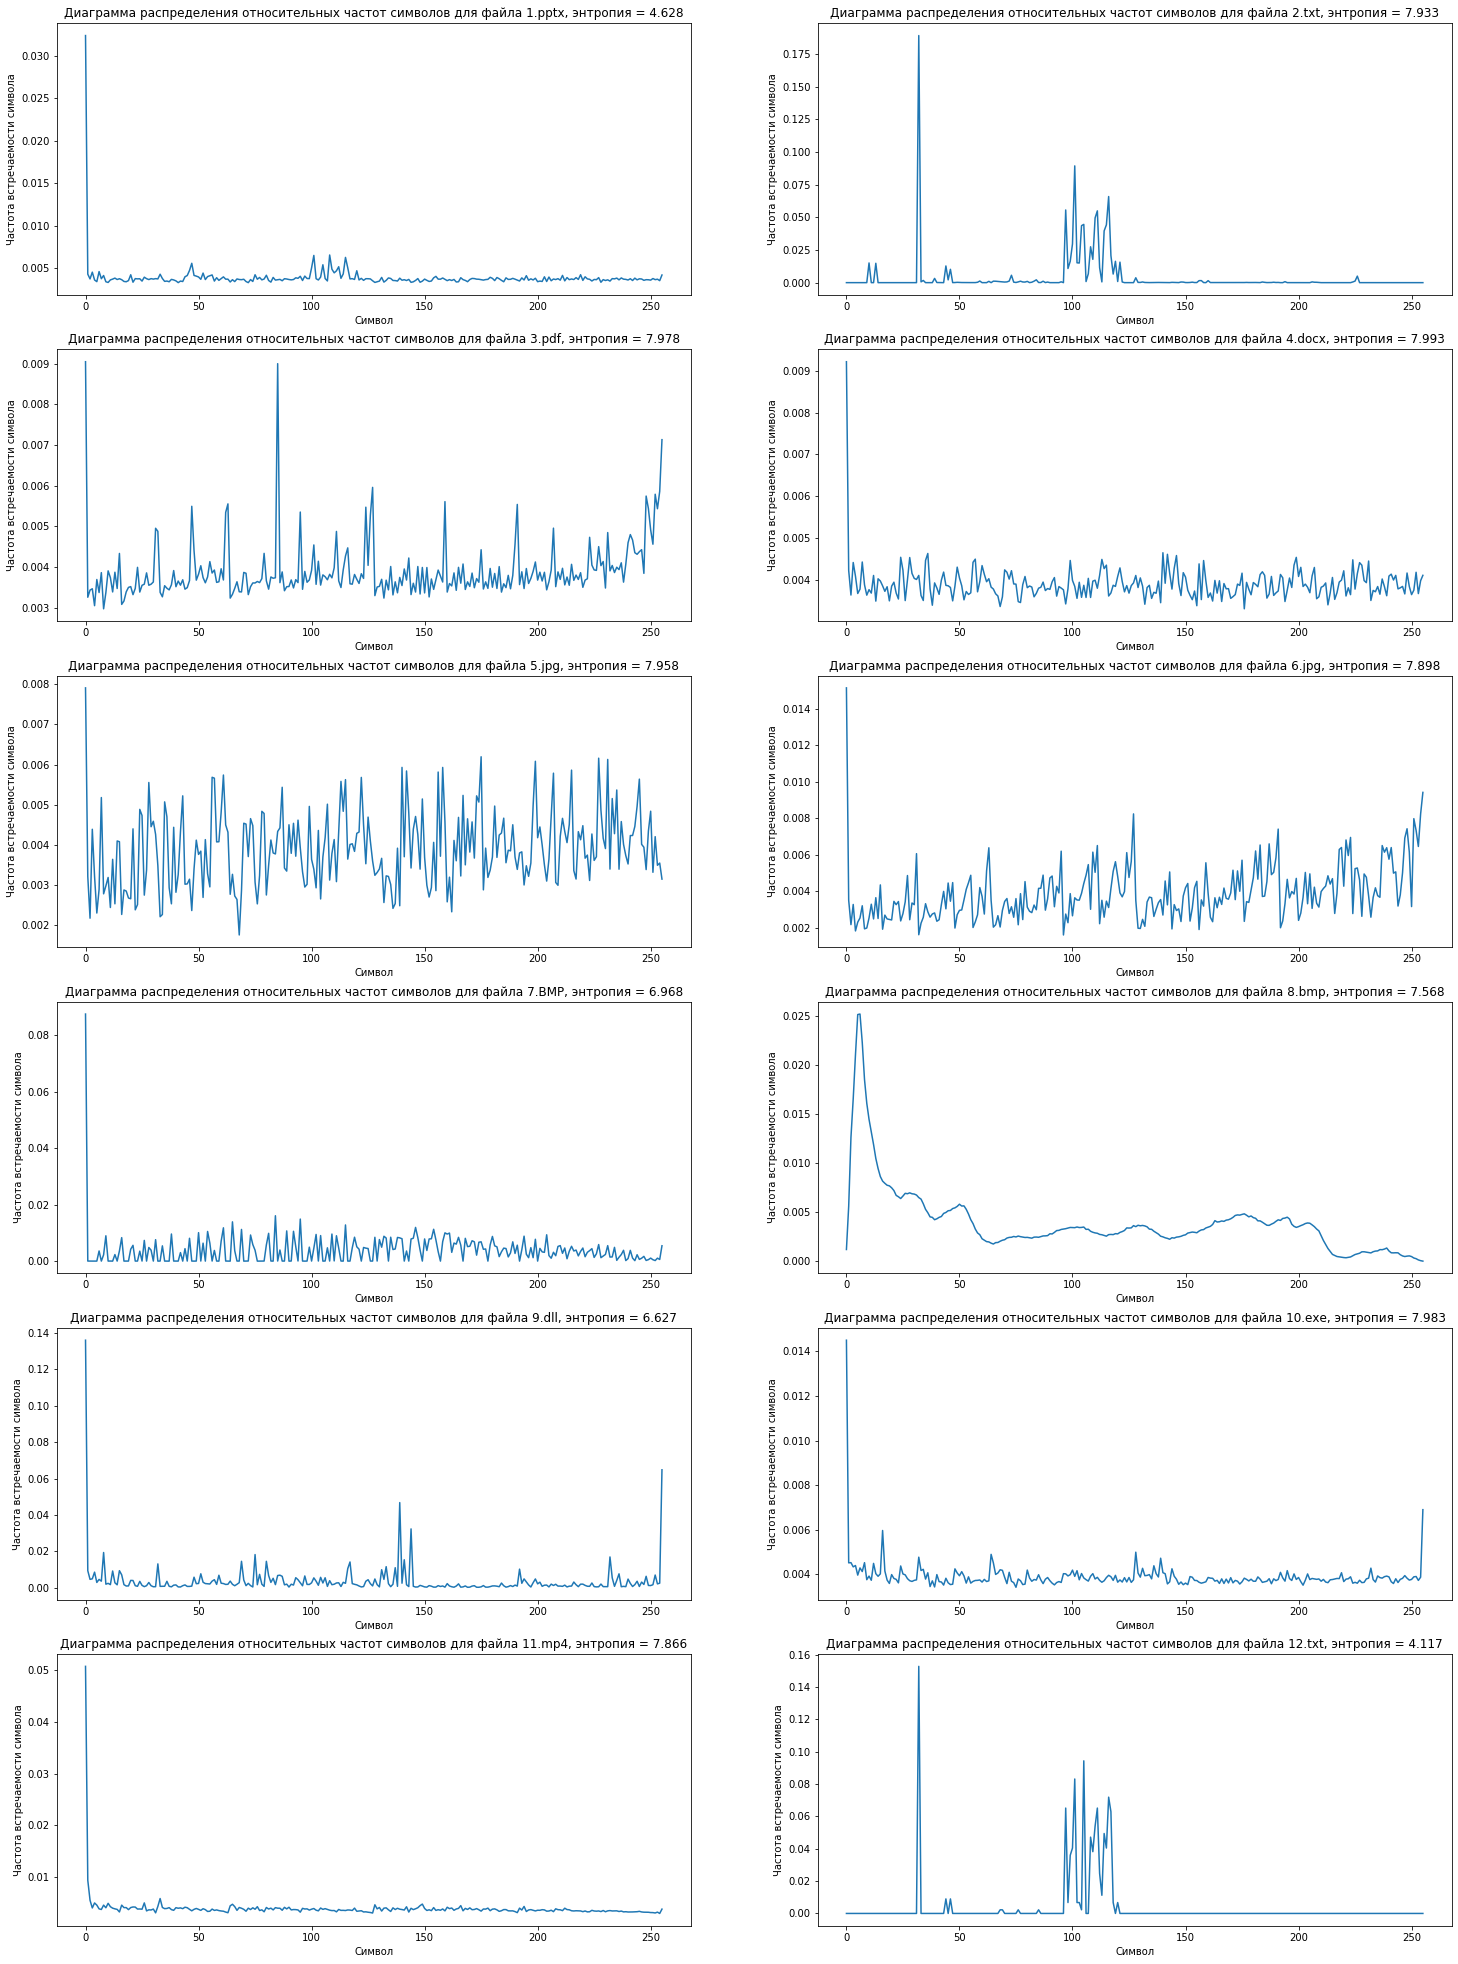

In [41]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(25, 35))

row, column = 0, 0
for file in frequency.columns:
    frequency[file].plot(ax=axes[row, column]); 

#     axes[row, column].set_ylim(top=0.1)
    
    axes[row, column].set_xlabel('Символ')
    axes[row, column].set_ylabel('Частота встречаемости символа')
    axes[row, column].set_title(f'Диаграмма распределения относительных частот символов для файла {file}, энтропия = {"{:.3f}".format(entropy[file].iloc[0])}')
    
    column += 1
    if column == 2:
        row += 1
        column = 0
        
plt.savefig("frequency.png")

# fig.delaxes(axes[row, column])

# the end (▀̿Ĺ̯▀̿ ̿)